In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as px
from plotly.subplots import make_subplots
from datetime import datetime

covid_df=pd.read_csv("C:/Users/Taesh/Desktop/New folder/Data Analysis/archive/covid_19_data.csv")
covid_df.head(10)
#covid_df.tail(10)

#covid_df.info()
#covid_df.describe()

#Adding the active cases
covid_df["Active_Cases"]=covid_df["Confirmed"]-covid_df["Recovered"]+covid_df["Deaths"]

covid_df.drop(['SNo','Last Update'], axis = 1)


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active_Cases
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0,9687.0
306425,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0,29392.0
306426,05/29/2021,Zhejiang,Mainland China,1364.0,1.0,1324.0,41.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0,5498.0


In [9]:
statewise=pd.pivot_table(covid_df, values=["Confirmed", "Deaths", "Recovered"],index="Country/Region", aggfunc=max)


statewise["Recovery Rate"] = statewise["Recovered"]*100/statewise["Confirmed"]
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise=statewise.sort_values(by = "Confirmed", ascending = False)
statewise.style.background_gradient(cmap="cubehelix")

NameError: name 'covid_df' is not defined

C:\Users\Taesh\AppData\Local\Temp\ipykernel_15500\951583312.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_10_active_cases = covid_df.groupby(by = 'Country/Region').max()[['Active_Cases', 'ObservationDate']].sort_values(by = ['Active_Cases'],ascending=False).reset_index()


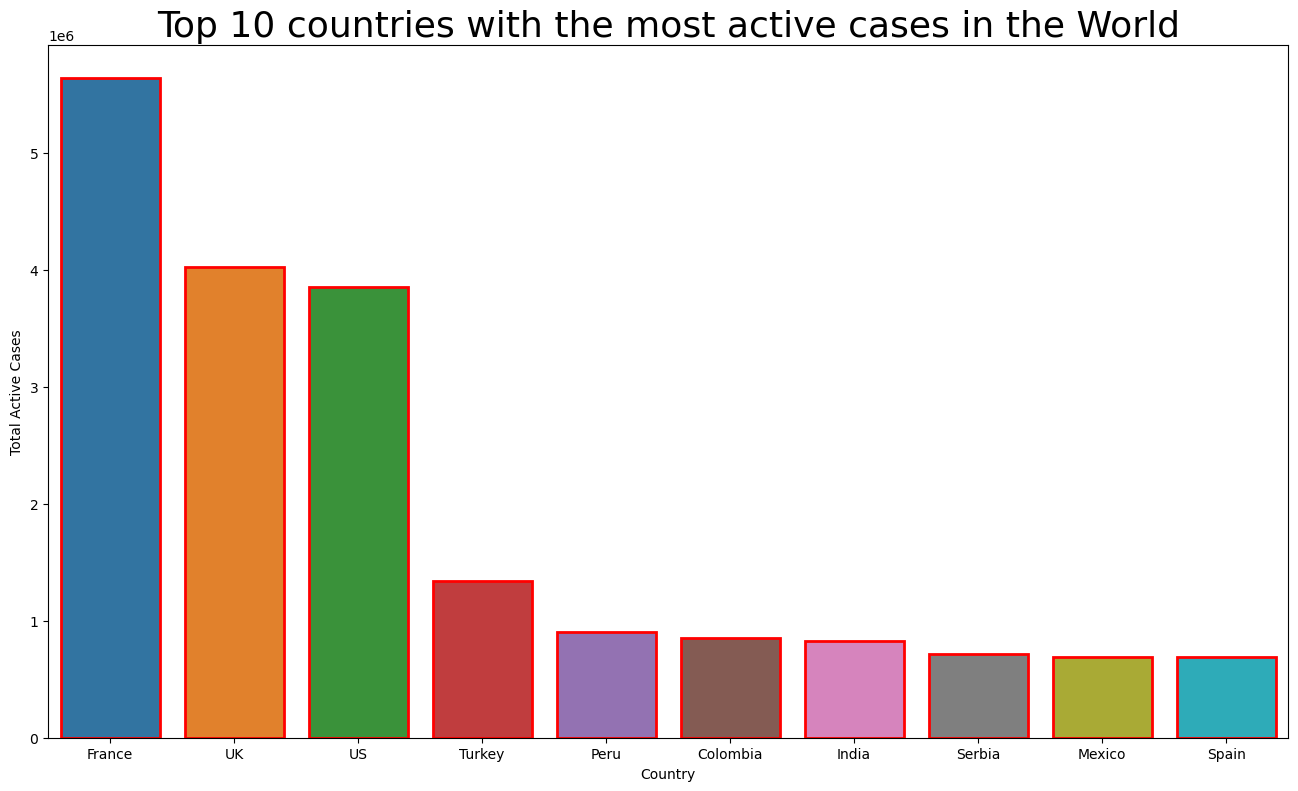

In [57]:
top_10_active_cases = covid_df.groupby(by = 'Country/Region').max()[['Active_Cases', 'ObservationDate']].sort_values(by = ['Active_Cases'],ascending=False).reset_index()
fig=plt.figure(figsize=(16, 9))
plt.title("Top 10 countries with the most active cases in the World", size=26)
ax = sns.barplot(data=top_10_active_cases.iloc[:10], y = "Active_Cases", x="Country/Region", linewidth = 2, edgecolor="red")
plt.xlabel("Country")
plt.ylabel("Total Active Cases")
plt.show()

C:\Users\Taesh\AppData\Local\Temp\ipykernel_15500\1166070504.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  highest_deaths= covid_df.groupby(by = 'Country/Region').max()[['Deaths', 'ObservationDate']].sort_values(by = ['Deaths'],ascending=False).reset_index()


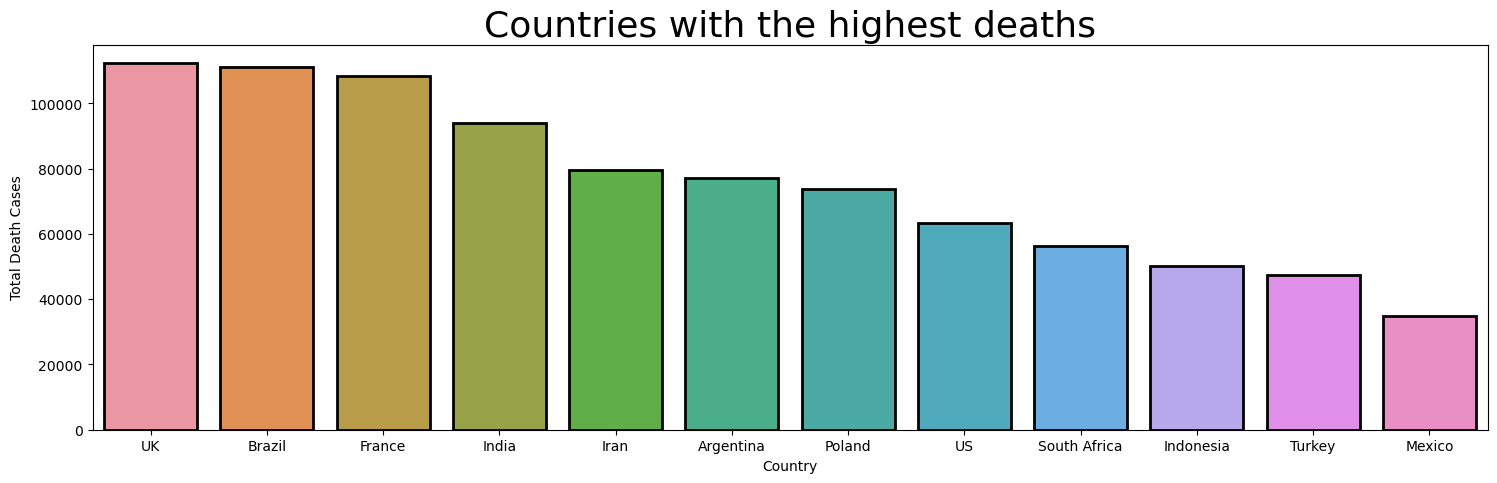

In [61]:
#Counties wth the highest deaths
highest_deaths= covid_df.groupby(by = 'Country/Region').max()[['Deaths', 'ObservationDate']].sort_values(by = ['Deaths'],ascending=False).reset_index()
fig = plt.figure(figsize=(18, 5))
plt.title("Countries with the highest deaths", size=26)
ax = sns.barplot(data = highest_deaths.iloc[:12], y = "Deaths", x="Country/Region", linewidth = 2, edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Total Death Cases")
plt.show()

In [67]:
#Growth Trends in the most active cases countries
fig = plt.figure(fig_size = (12, 6))
ax = sns.lineplot(data = covid_df[covid_df['Country/Region'].isin(['France','UK','US','Peru','Colombia','India']), x = 'ObservationDate', y = 'Active_Cases', hue = 'Country/Region'])
ax.set_title('Top 7 affected states', size=17)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3000351859.py, line 3)